In [135]:
import pandas as pd 
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score
import math
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [3]:
train.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [4]:
train.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [75]:
encode = LabelEncoder()
train['POSTED_BY'] = encode.fit_transform(train['POSTED_BY'])
train['BHK_OR_RK'] = encode.fit_transform(train['BHK_OR_RK'])

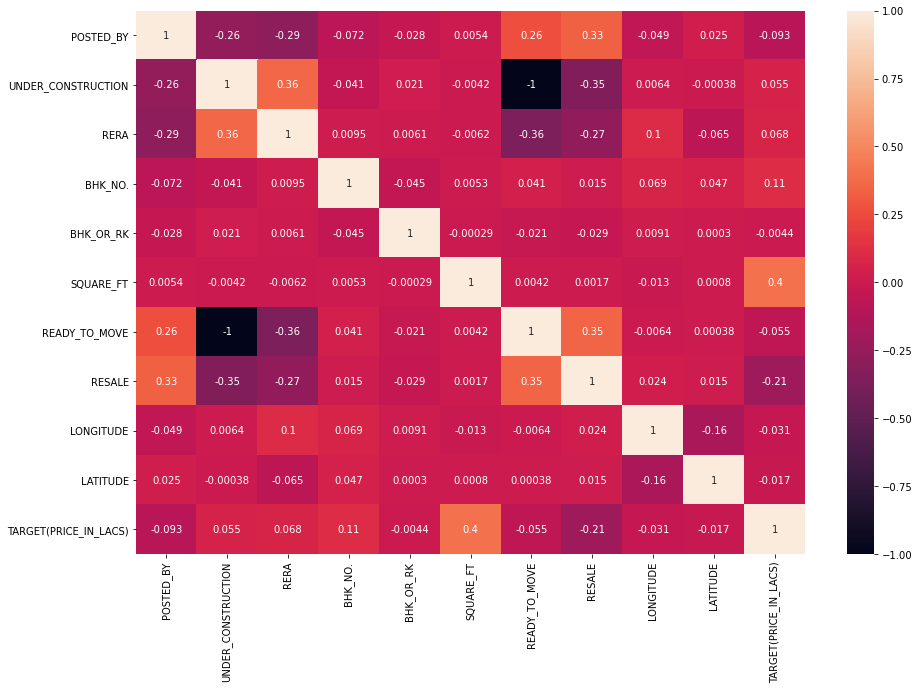

In [25]:
plt.figure(figsize=(15, 10))
sbn.heatmap(train.corr(), annot=True)
plt.show()

In [76]:
train['ADDRESS'] = train['ADDRESS'].str.split(',').apply(lambda x: x[-1])

In [77]:
train['ADDRESS'] = encode.fit_transform(train['ADDRESS'])

In [28]:
train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,2,0,1300.236407,1,1,21,12.969910,77.597960,55.0
1,1,0,0,2,0,1275.000000,1,1,160,12.274538,76.644605,51.0
2,2,0,0,2,0,933.159722,1,1,21,12.778033,77.632191,43.0
3,2,0,1,2,0,929.921143,1,1,78,28.642300,77.344500,62.5
4,1,1,0,2,0,999.009247,0,1,134,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,2,0,0,3,0,2500.000000,1,1,1,27.140626,78.043277,45.0
29447,2,0,0,2,0,769.230769,1,1,244,39.945409,-86.150721,16.0
29448,1,0,0,2,0,1022.641509,1,1,105,26.928785,75.828002,27.1
29449,2,0,0,2,0,927.079009,1,1,49,12.900150,80.227910,67.0


# Training and testing and fitting of the model

In [128]:
x = train.drop(['TARGET(PRICE_IN_LACS)', 'BHK_OR_RK'], axis=1)
y = train['TARGET(PRICE_IN_LACS)']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [130]:
regressor = RandomForestRegressor(n_estimators = 100, max_depth=25)
model = regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [138]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(train_score, test_score)

0.9826699397756142 0.950926632128993


# Using Cross-validation score because of overfitting of data

In [131]:
score = cross_val_score(model, x, y, cv=10)

In [132]:
score.mean()

0.9062493695614785